Epoch [500/20000], Loss: 0.0010
Epoch [1000/20000], Loss: 0.0001
Epoch [1500/20000], Loss: 0.0001
Epoch [2000/20000], Loss: 0.0000
Epoch [2500/20000], Loss: 0.0000
Epoch [3000/20000], Loss: 0.0000
Epoch [3500/20000], Loss: 0.0000
Epoch [4000/20000], Loss: 0.0000
Epoch [4500/20000], Loss: 0.0000
Epoch [5000/20000], Loss: 0.0000
Epoch [5500/20000], Loss: 0.0000
Epoch [6000/20000], Loss: 0.0000
Epoch [6500/20000], Loss: 0.0000
Epoch [7000/20000], Loss: 0.0000
Epoch [7500/20000], Loss: 0.0000
Epoch [8000/20000], Loss: 0.0000
Epoch [8500/20000], Loss: 0.0000
Epoch [9000/20000], Loss: 0.0000
Epoch [9500/20000], Loss: 0.0000
Epoch [10000/20000], Loss: 0.0000
Epoch [10500/20000], Loss: 0.0000
Epoch [11000/20000], Loss: 0.0000
Epoch [11500/20000], Loss: 0.0001
Epoch [12000/20000], Loss: 0.0000
Epoch [12500/20000], Loss: 0.0000
Epoch [13000/20000], Loss: 0.0000
Epoch [13500/20000], Loss: 0.0001
Epoch [14000/20000], Loss: 0.0003
Epoch [14500/20000], Loss: 0.0000
Epoch [15000/20000], Loss: 0.0000


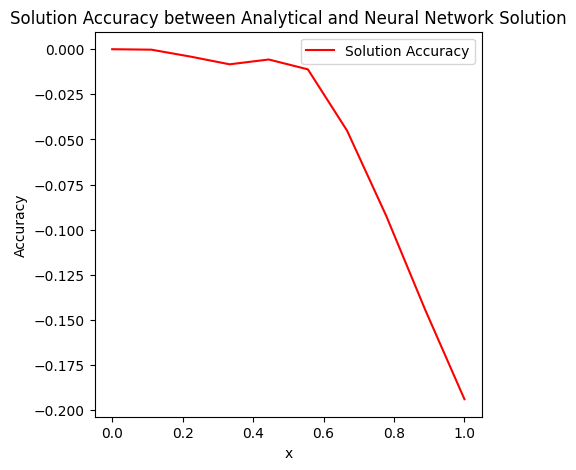

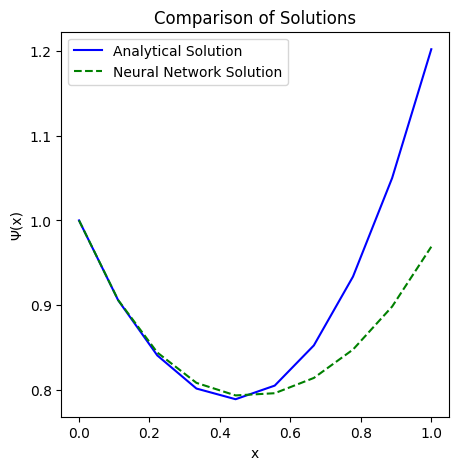

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.hidden(x)

# Define the trial function Ψ_t(x) = 1 + xN(x, p)
def Psi_t(x, net):
    return 1 + x * net(x)

# Define the differential equation loss
def loss_function(x, net):
    x = x.requires_grad_(True)
    Psi_t_x = Psi_t(x, net)

    # Calculate the first derivative dΨ/dx
    dPsi_t_x = torch.autograd.grad(Psi_t_x, x, torch.ones_like(x), create_graph=True)[0]

    # Define the original equation parts
    equation_lhs = dPsi_t_x + (x + (1 + 3 * x**2) / (1 + x + x**3)) * Psi_t_x
    equation_rhs = (x**3 + 2 * x + x**2) / ((1 + 3 * x**2) / (1 + x + x**3))

    # Calculate the loss as the mean squared error of the differential equation
    loss = torch.mean((equation_lhs - equation_rhs)**2)

    return loss

# Check if GPU is available and set device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Training the neural network
net = Net().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
epochs = 20000

x_train = torch.linspace(0, 1, 10).view(-1, 1).to(device)

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = loss_function(x_train, net)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Generate predictions
x_test = torch.linspace(0, 1, 10).view(-1, 1).to(device)
with torch.no_grad():
    Psi_pred = Psi_t(x_test, net).cpu().numpy()  # Move predictions back to CPU for plotting

# Analytical solution Ψ_a(x) = e^(-x^2/2) + x^2
x = np.linspace(0, 1, 10)
Psi_analytical = (np.exp(-x**2 / 2)/(1+x+x**3)) + x**2

# Calculate accuracy as a percentage (1 - relative error)
accuracy = 1 - np.abs((Psi_analytical - Psi_pred.flatten()) / Psi_analytical)

# Plotting the results
plt.figure(figsize=(5, 5))
plt.plot(x, accuracy-1, 'r-', label='Solution Accuracy')
plt.xlabel('x')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Solution Accuracy between Analytical and Neural Network Solution')
plt.show()




 #Define the finite element method approximation function
def Psi_fem(x):
    return (np.exp(-x*2 / 2))+(x**2)

# Calculate the FEM approximation
Psi_fem_values = Psi_fem(x)

# Plotting the results
plt.figure(figsize=(5, 5))
plt.plot(x, Psi_analytical, 'b-', label='Analytical Solution')
plt.plot(x, Psi_pred, 'g--', label='Neural Network Solution')
plt.xlabel('x')
plt.ylabel('Ψ(x)')
plt.legend()
plt.title('Comparison of Solutions')
plt.show()

Epoch 0, Loss: 0.49639278650283813
Epoch 100, Loss: 0.28778430819511414
Epoch 200, Loss: 0.14546139538288116
Epoch 300, Loss: 0.12336693704128265
Epoch 400, Loss: 0.09997173398733139
Epoch 500, Loss: 0.08841636031866074
Epoch 600, Loss: 0.0830051600933075
Epoch 700, Loss: 0.07639693468809128
Epoch 800, Loss: 0.063057541847229
Epoch 900, Loss: 0.05151490494608879
Epoch 1000, Loss: 0.041519034653902054
Epoch 1100, Loss: 0.040356896817684174
Epoch 1200, Loss: 0.03229358047246933
Epoch 1300, Loss: 0.02698769047856331
Epoch 1400, Loss: 0.026181869208812714
Epoch 1500, Loss: 0.02075125277042389
Epoch 1600, Loss: 0.018994584679603577
Epoch 1700, Loss: 0.015141421929001808
Epoch 1800, Loss: 0.013733812607824802
Epoch 1900, Loss: 0.012526744045317173
Epoch 2000, Loss: 0.011459801346063614
Epoch 2100, Loss: 0.011145615950226784
Epoch 2200, Loss: 0.008849555626511574
Epoch 2300, Loss: 0.008219857700169086
Epoch 2400, Loss: 0.006925161927938461
Epoch 2500, Loss: 0.006572695914655924
Epoch 2600, Lo

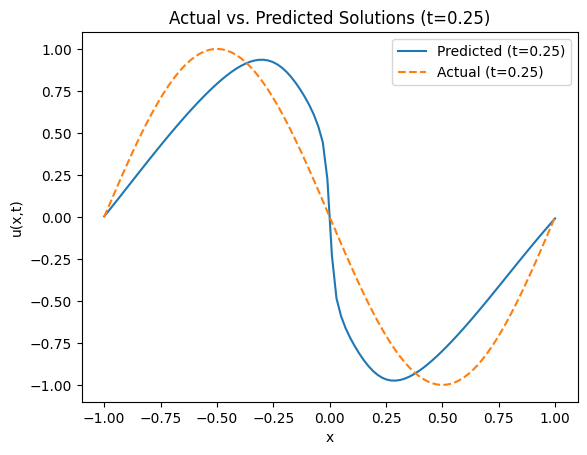

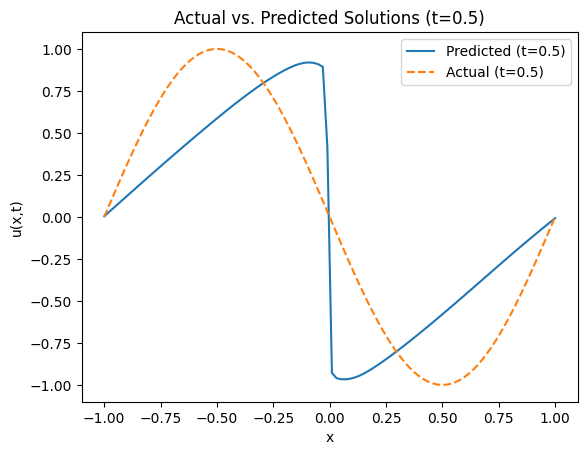

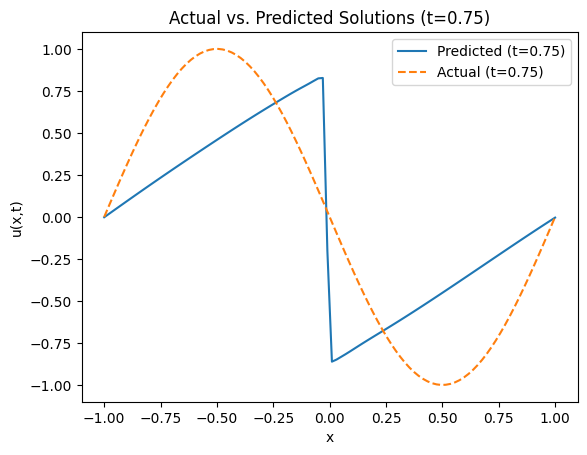

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layers = nn.ModuleList([nn.Linear(2, 20).to(device)] + [nn.Linear(20, 20).to(device) for _ in range(7)])
        self.output_layer = nn.Linear(20, 1).to(device)
        self.activation = nn.Tanh()

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        return self.output_layer(x)
def burgers_residual(u, t, x):
    u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    residual = u_t + u * u_x - (0.01 / np.pi) * u_xx
    return residual
def loss_function(model, t_collocation, x_collocation, x_initial, u_initial, t_boundary, x_boundary, u_boundary):
    # Collocation points loss
    t_collocation.requires_grad_(True)
    x_collocation.requires_grad_(True)
    u_pred = model(torch.cat([t_collocation, x_collocation], dim=1))
    residual = burgers_residual(u_pred, t_collocation, x_collocation)
    loss_residual = torch.mean(residual**2)

    # Initial condition loss
    u_0_pred = model(torch.cat([torch.zeros_like(x_initial), x_initial], dim=1))
    loss_initial = torch.mean((u_0_pred - u_initial)**2)

    # Boundary condition loss
    u_boundary_pred = model(torch.cat([t_boundary, x_boundary], dim=1))
    loss_boundary = torch.mean(u_boundary_pred**2)

    return loss_residual + loss_initial + loss_boundary
sampler = qmc.LatinHypercube(d=2)
collocation_points = sampler.random(n=10000)
t_collocation = torch.tensor(collocation_points[:, 0], dtype=torch.float32).reshape(-1, 1).to(device)
x_collocation = torch.tensor(collocation_points[:, 1] * 2 - 1, dtype=torch.float32).reshape(-1, 1).to(device)

# Initial and boundary conditions
x_initial = torch.linspace(-1, 1, 100).reshape(-1, 1).to(device)
u_initial = -torch.sin(np.pi * x_initial)
t_boundary = torch.linspace(0, 1, 100).reshape(-1, 1).to(device)
x_boundary_left = -torch.ones_like(t_boundary)
x_boundary_right = torch.ones_like(t_boundary)
x_boundary = torch.cat([x_boundary_left, x_boundary_right], dim=0).to(device)
t_boundary = torch.cat([t_boundary, t_boundary], dim=0).to(device)
u_boundary = torch.zeros_like(x_boundary).to(device)
model = PINN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = loss_function(model, t_collocation, x_collocation, x_initial, u_initial, t_boundary, x_boundary, u_boundary)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')
t_vals = [0.25, 0.5, 0.75]
x_plot = torch.linspace(-1, 1, 100).reshape(-1, 1).to(device)

for t_val in t_vals:
    t_plot = torch.full_like(x_plot, t_val)
    u_pred = model(torch.cat([t_plot, x_plot], dim=1)).detach().cpu().numpy()
    u_actual = -np.sin(np.pi * x_plot.cpu().numpy())  # Compute actual solution
    plt.plot(x_plot.cpu(), u_pred, label=f'Predicted (t={t_val})')
    plt.plot(x_plot.cpu(), u_actual, linestyle='--', label=f'Actual (t={t_val})')

    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.title(f'Actual vs. Predicted Solutions (t={t_val})')
    plt.show()